In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(rc={'figure.figsize':(16,6)})
sns.set(style='whitegrid')
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [2]:
loc1 = r"C:\Users\madhu\Downloads\Compressed\m5-forecasting-accuracy\calendar.csv"
loc2 = r"C:\Users\madhu\Downloads\Compressed\m5-forecasting-accuracy\sales_train_validation.csv"
loc3 = r"C:\Users\madhu\Downloads\Compressed\m5-forecasting-accuracy\sell_prices.csv"
loc4 = r"C:\Users\madhu\Downloads\Compressed\m5-forecasting-accuracy\sample_submission.csv"

In [3]:
calender = pd.read_csv(loc1)
sales_train_validation = pd.read_csv(loc2)
sell_prices = pd.read_csv(loc3)
sample_submission = pd.read_csv(loc4)

In [4]:
sales_train_validation.head(3)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1


In [5]:
calender.head(3)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0


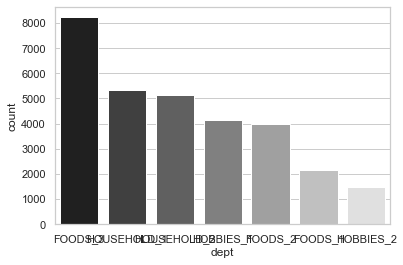

In [6]:
dept_df = sales_train_validation.dept_id.value_counts().rename_axis('dept').reset_index(name='count')
sns.barplot(x='dept', y='count', data=dept_df, palette='gist_gray')

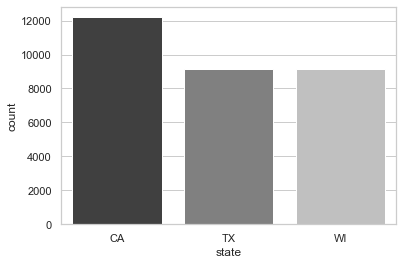

In [7]:
state_df = sales_train_validation.state_id.value_counts().rename_axis('state').reset_index(name='count')
sns.barplot(x='state', y='count', data=state_df, palette='gist_gray')

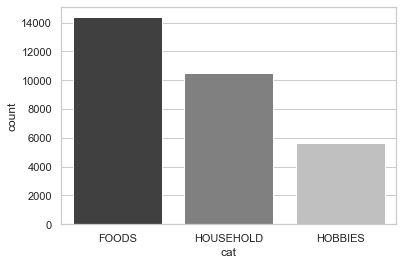

In [8]:
cat_df = sales_train_validation.cat_id.value_counts().rename_axis('cat').reset_index(name='count')
sns.barplot(x='cat', y='count', data=cat_df, palette='gist_gray')

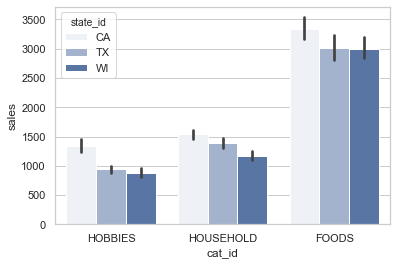

In [9]:
sales_train_validation['sales'] = sales_train_validation.sum(axis=1)
sns.barplot(x='cat_id', y='sales', data=sales_train_validation, hue='state_id', color=next(color_cycle))

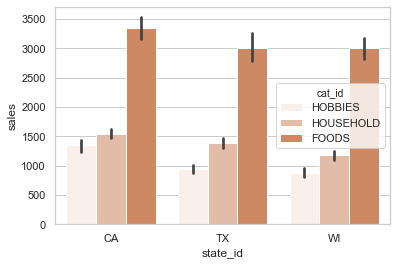

In [10]:
sns.barplot(x='state_id', y='sales', data=sales_train_validation, hue='cat_id', color=next(color_cycle))

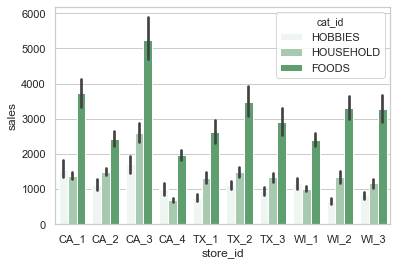

In [11]:
sns.barplot(x='store_id', y='sales', data=sales_train_validation, hue='cat_id', color=next(color_cycle))

In [12]:
d_cols = [col for col in sales_train_validation.columns if 'd_' in col]

sales_train_validation.loc[sales_train_validation.id=='FOODS_3_090_CA_3_validation']


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,sales
8412,FOODS_3_090_CA_3_validation,FOODS_3_090,FOODS_3,FOODS,CA_3,CA,108,132,102,120,...,160,204,86,100,88,77,141,139,130,250502


In [13]:
sales_train_validation.sort_values('sales', ascending=False).sample(5)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,sales
19398,HOUSEHOLD_2_008_TX_3_validation,HOUSEHOLD_2_008,HOUSEHOLD_2,HOUSEHOLD,TX_3,TX,0,0,0,0,...,0,0,1,0,0,0,0,0,0,172
2885,FOODS_3_661_CA_1_validation,FOODS_3_661,FOODS_3,FOODS,CA_1,CA,0,0,0,0,...,3,11,1,4,3,1,4,4,5,2794
20895,FOODS_3_377_TX_3_validation,FOODS_3_377,FOODS_3,FOODS,TX_3,TX,37,40,27,31,...,45,41,23,43,39,42,52,48,50,73797
11626,FOODS_3_255_CA_4_validation,FOODS_3_255,FOODS_3,FOODS,CA_4,CA,0,0,0,0,...,1,2,0,0,1,2,0,0,1,115
24831,HOBBIES_2_024_WI_2_validation,HOBBIES_2_024,HOBBIES_2,HOBBIES,WI_2,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,0,197


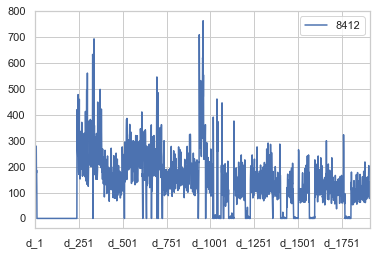

In [16]:
sales_train_validation.loc[sales_train_validation.id=='FOODS_3_090_CA_3_validation'][d_cols].T.plot()

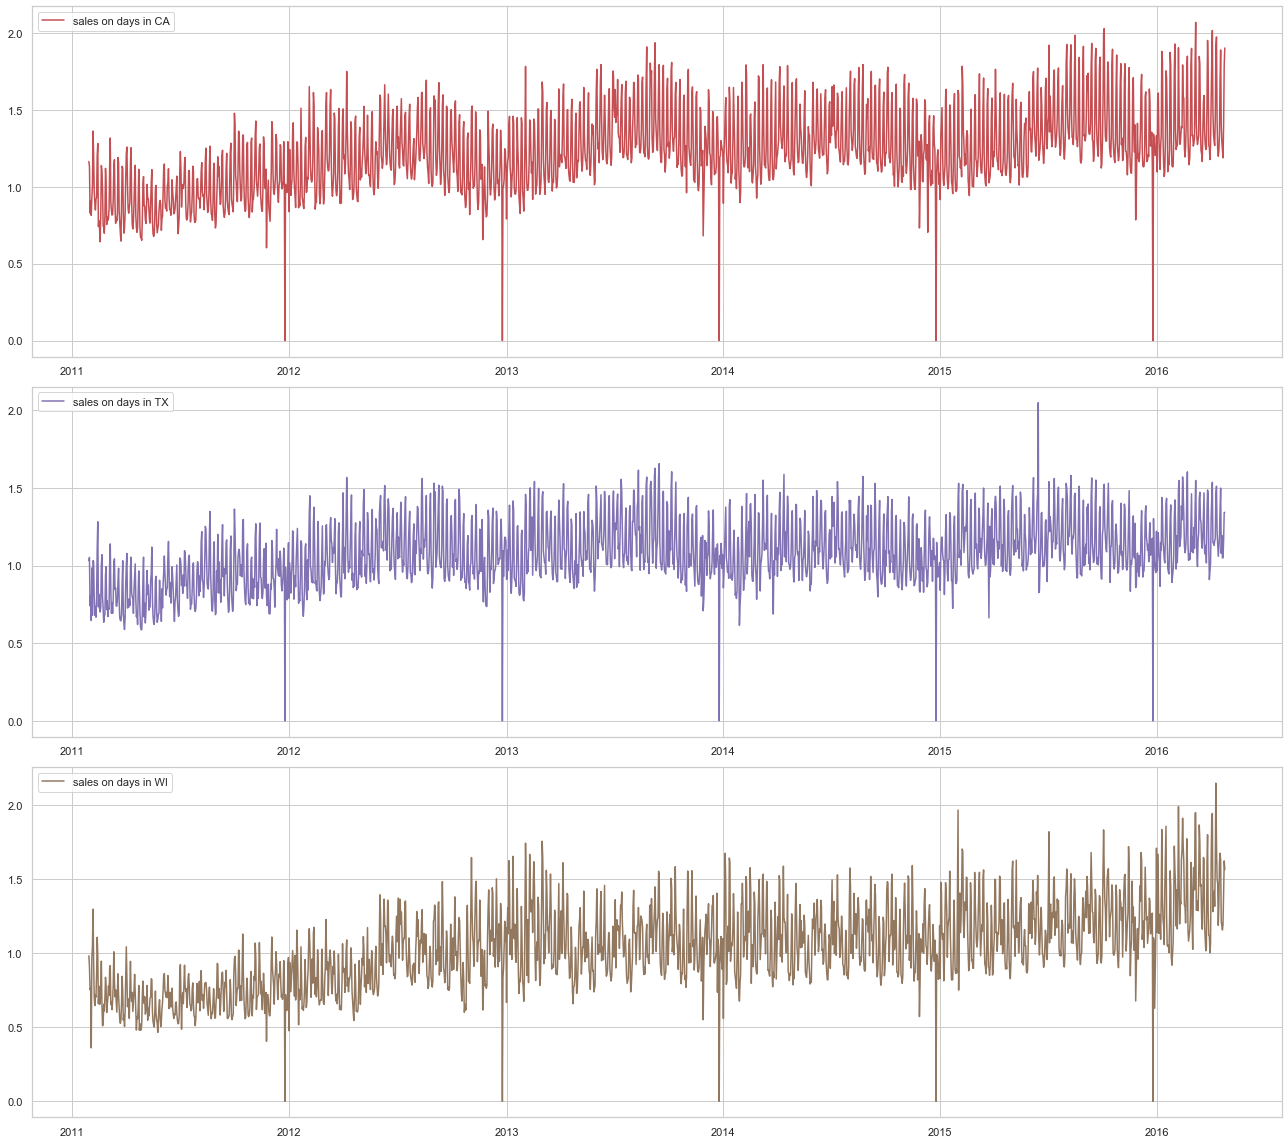

In [17]:
# Yearly sales in all the stores
mean_sales_CA = sales_train_validation[sales_train_validation.state_id=='CA'][d_cols].mean(axis=0).reset_index().set_index(calender[0:1913]['date'])
mean_sales_CA = mean_sales_CA.drop('index', axis=1)
mean_sales_CA.index = pd.to_datetime(mean_sales_CA.index)
mean_sales_CA.columns = ['mean_sale_items']

mean_sales_TX = sales_train_validation[sales_train_validation.state_id=='TX'][d_cols].mean(axis=0).reset_index().set_index(calender[0:1913]['date'])
mean_sales_TX = mean_sales_TX.drop('index', axis=1)
mean_sales_TX.index = pd.to_datetime(mean_sales_TX.index)
mean_sales_TX.columns = ['mean_sale_items']

mean_sales_WI = sales_train_validation[sales_train_validation.state_id=='WI'][d_cols].mean(axis=0).reset_index().set_index(calender[0:1913]['date'])
mean_sales_WI = mean_sales_WI.drop('index', axis=1)
mean_sales_WI.index = pd.to_datetime(mean_sales_WI.index)
mean_sales_WI.columns = ['mean_sale_items']

# Plotting sale of items in all three cities
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(18,16), sharex=False)

ax1.plot(mean_sales_CA, label='sales on days in CA', color=next(color_cycle))
ax1.legend(loc='upper left')

ax2.plot(mean_sales_TX, label='sales on days in TX', color=next(color_cycle))
ax2.legend(loc='upper left')

ax3.plot(mean_sales_WI, label='sales on days in WI', color=next(color_cycle))
ax3.legend(loc='upper left')

plt.tight_layout()
plt.show() 

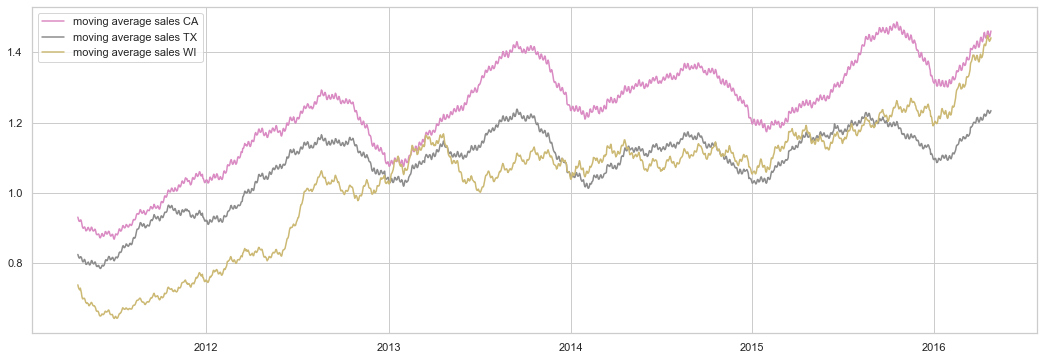

In [18]:
# Plotting the moving avrage
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(mean_sales_CA.rolling(window=80).mean(), label='moving average sales CA', color=next(color_cycle))
ax.plot(mean_sales_TX.rolling(window=80).mean(), label='moving average sales TX', color=next(color_cycle))
ax.plot(mean_sales_WI.rolling(window=80).mean(), label='moving average sales WI', color=next(color_cycle))
plt.legend()
plt.show()

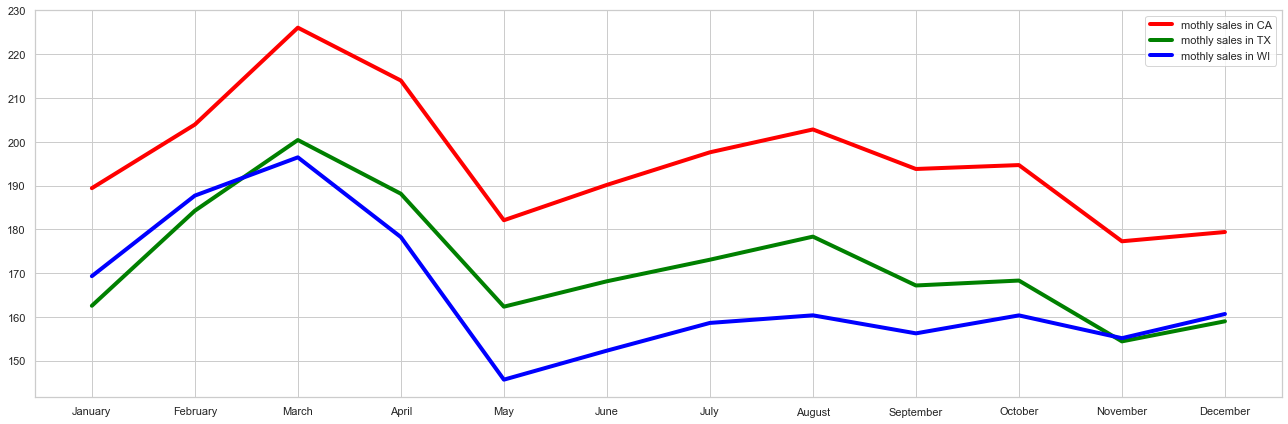

In [19]:
# Monthly sales across the states
mean_sales_CA['month'] = pd.DatetimeIndex(mean_sales_CA.index).month_name()
mean_sales_CA['weekday_name'] = pd.DatetimeIndex(mean_sales_CA.index).weekday_name

mean_sales_TX['month'] = pd.DatetimeIndex(mean_sales_TX.index).month_name()
mean_sales_TX['weekday_name'] = pd.DatetimeIndex(mean_sales_TX.index).weekday_name

mean_sales_WI['month'] = pd.DatetimeIndex(mean_sales_WI.index).month_name()
mean_sales_WI['weekday_name'] = pd.DatetimeIndex(mean_sales_WI.index).weekday_name

new_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

mean_sales_CA_grouped = mean_sales_CA.groupby(['month']).sum().reindex(new_order, axis=0)
mean_sales_TX_grouped = mean_sales_TX.groupby(['month']).sum().reindex(new_order, axis=0)
mean_sales_WI_grouped = mean_sales_WI.groupby(['month']).sum().reindex(new_order, axis=0)

fig, ax = plt.subplots(figsize=(18,6))

ax.plot(mean_sales_CA_grouped, label='mothly sales in CA', c='red', linewidth=4)
ax.plot(mean_sales_TX_grouped, label='mothly sales in TX', c='green', linewidth=4)
ax.plot(mean_sales_WI_grouped, label='mothly sales in WI', c='blue', linewidth=4)

ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

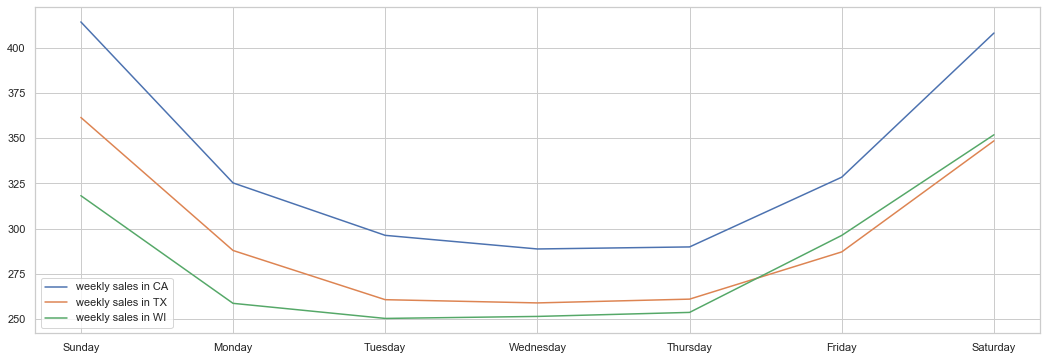

In [20]:
new_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
mean_sales_CA_grouped = mean_sales_CA.groupby(['weekday_name']).sum().reindex(new_order, axis=0)
mean_sales_TX_grouped = mean_sales_TX.groupby(['weekday_name']).sum().reindex(new_order, axis=0)
mean_sales_WI_grouped = mean_sales_WI.groupby(['weekday_name']).sum().reindex(new_order, axis=0)
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(mean_sales_CA_grouped, label='weekly sales in CA')
ax.plot(mean_sales_TX_grouped, label='weekly sales in TX')
ax.plot(mean_sales_WI_grouped, label='weekly sales in WI')
plt.legend()
plt.show()

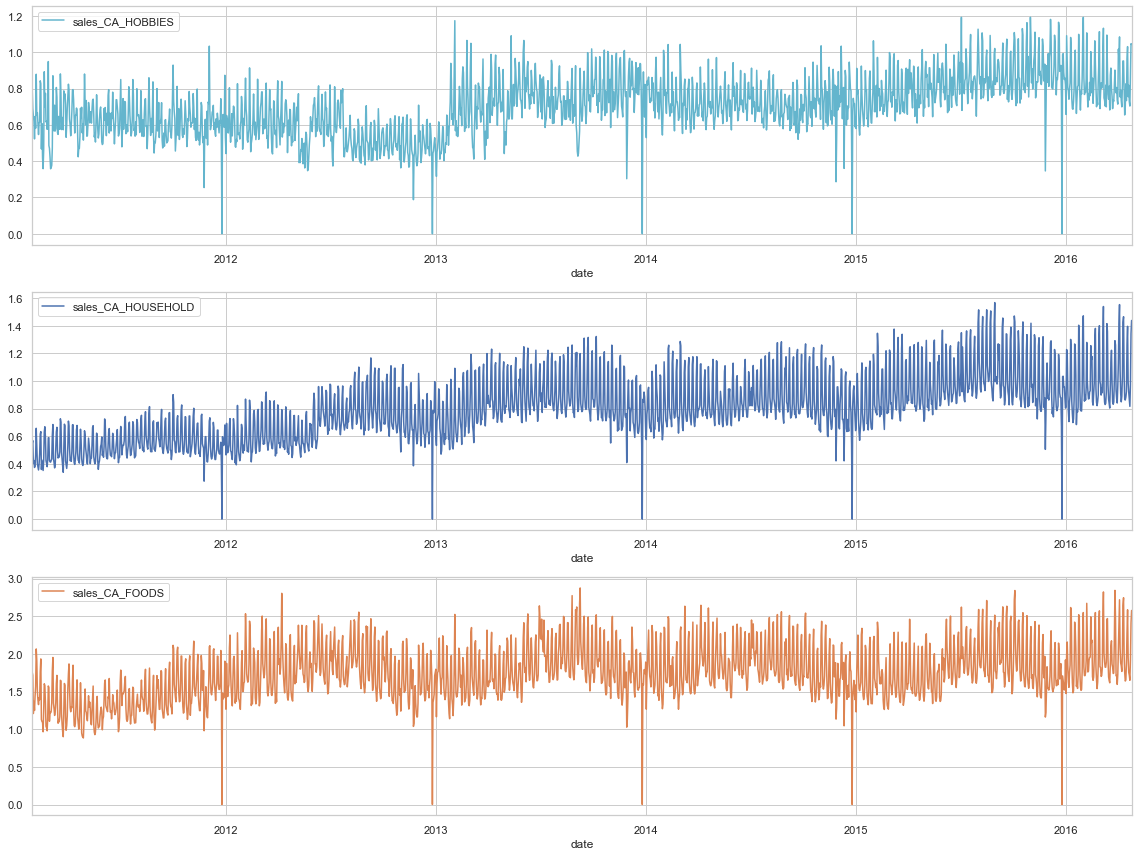

In [21]:
# Hobbey item sales in California
fig, axs = plt.subplots(3, 1, figsize=(16,12))
axs = axs.flatten()
ax_idx = 0
for cat in sales_train_validation.cat_id.unique():
    sales = sales_train_validation[(sales_train_validation.cat_id==cat) & (sales_train_validation.state_id=='CA')][d_cols].T.\
    mean(axis=1).reset_index().set_index(calender[0:1913]['date']).drop('index', 1)
    sales.columns = ['sales_CA_'+str(cat)]
    sales.index = pd.to_datetime(sales.index)
    sales.plot(color=next(color_cycle), ax=axs[ax_idx])
    ax_idx += 1
plt.tight_layout()
plt.show()

In [22]:
# Sales by store
sales_train_validation = pd.read_csv(loc2)
sales_by_store = sales_train_validation.groupby(['store_id']).mean().T
sales_by_store = sales_by_store.set_index(calender[0:1913]['date'])
sales_by_store.index = pd.to_datetime(sales_by_store.index)

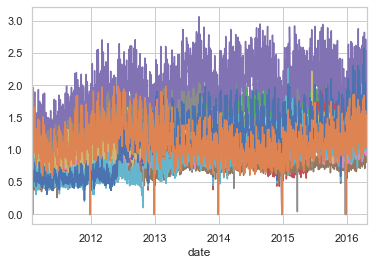

In [23]:
fig,ax = plt.subplots()
for col in sales_by_store.columns:
    sales_by_store[col].plot(color=next(color_cycle), label='avg sales '+str(col), ax=ax)
plt.show()

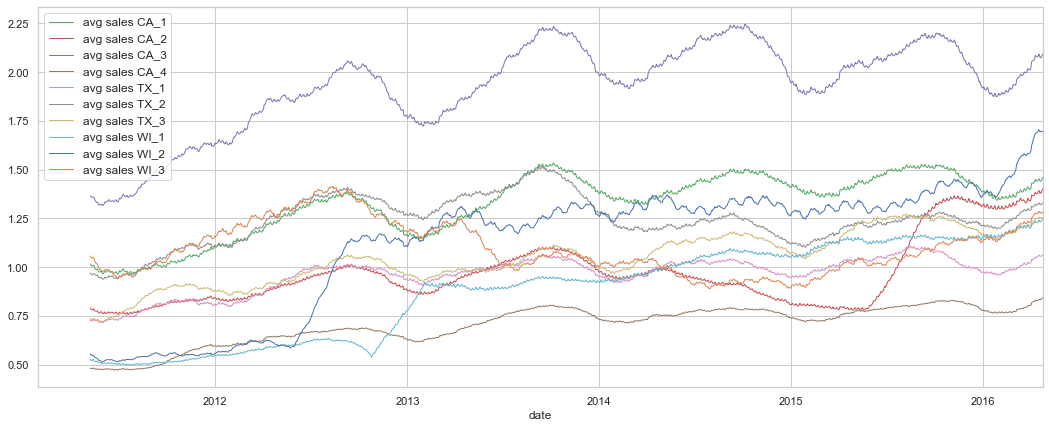

In [24]:
# moving average sales in all the 10 shops
import matplotlib.dates as mdates

sales_rolling = sales_by_store.rolling(100).mean()
fig,ax = plt.subplots(figsize=(18,7))
for col in sales_by_store.columns:
    sales_rolling[col].plot( label='avg sales '+str(col), ax=ax, color=next(color_cycle), linewidth=1)
#ax.xaxis.set_major_locator(mdates.YearLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend(fontsize=12)
plt.show()

In [25]:
sales_by_store['month'] = pd.DatetimeIndex(sales_by_store.index).month_name()
sales_by_store['weekdays'] = pd.DatetimeIndex(sales_by_store.index).weekday_name

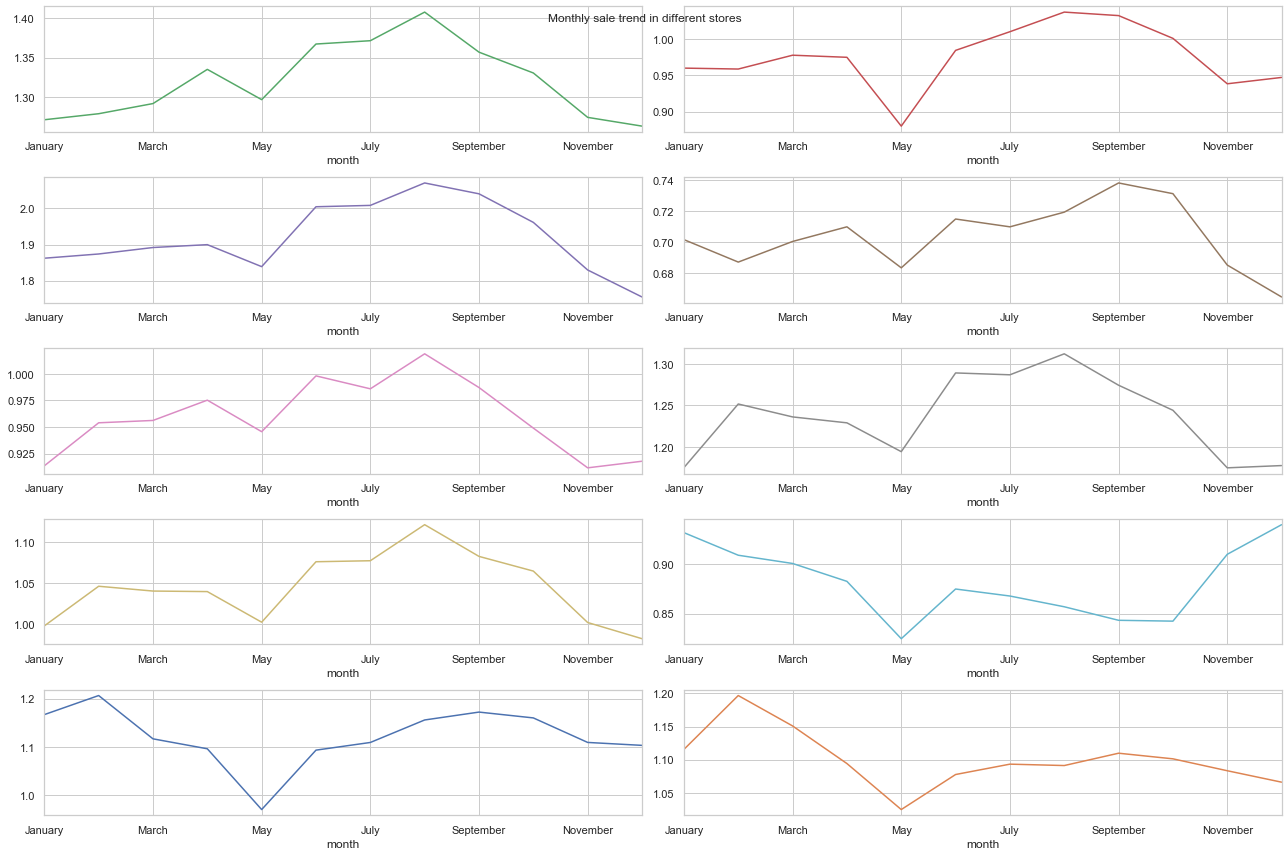

In [26]:
# Monhtly sales across the stores
new_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_store_sales = sales_by_store.groupby(['month']).mean().reindex(new_order, axis=0)
fig, axs = plt.subplots(5,2,figsize=(18,12))
axs = axs.flatten()
ax_idx = 0
for col in monthly_store_sales.columns[0:11]:
    monthly_store_sales[col].plot(color=next(color_cycle), ax=axs[ax_idx])
    ax_idx+=1
plt.suptitle('Monthly sale trend in different stores')
plt.tight_layout()
plt.show()

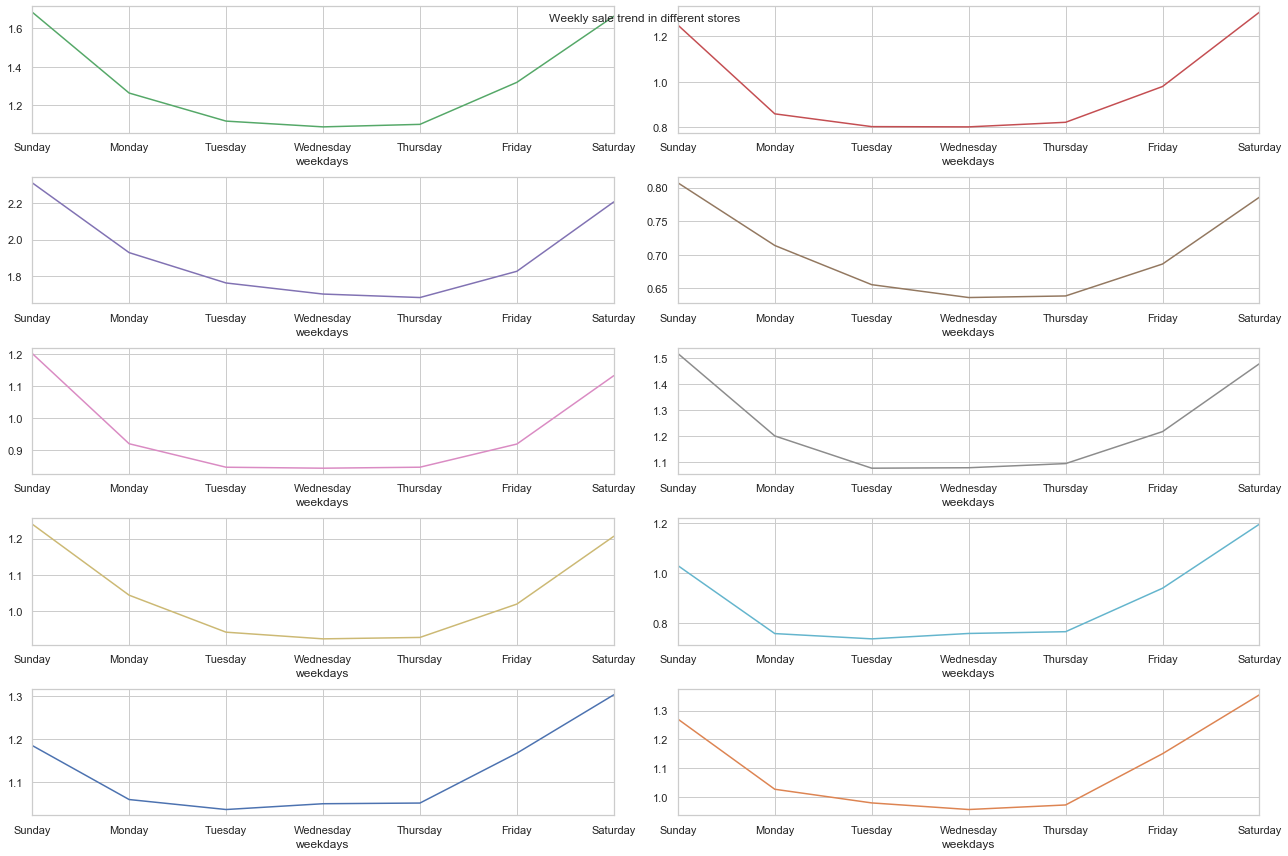

In [27]:
# Weekly sales across the stores
new_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
weekly_store_sales = sales_by_store.groupby(['weekdays']).mean().reindex(new_order, axis=0)
fig, axs = plt.subplots(5,2,figsize=(18,12))
axs = axs.flatten()
ax_idx = 0
for col in weekly_store_sales.columns[0:11]:
    weekly_store_sales[col].plot(color=next(color_cycle), ax=axs[ax_idx])
    ax_idx+=1
plt.suptitle('Weekly sale trend in different stores')
plt.tight_layout()
plt.show()

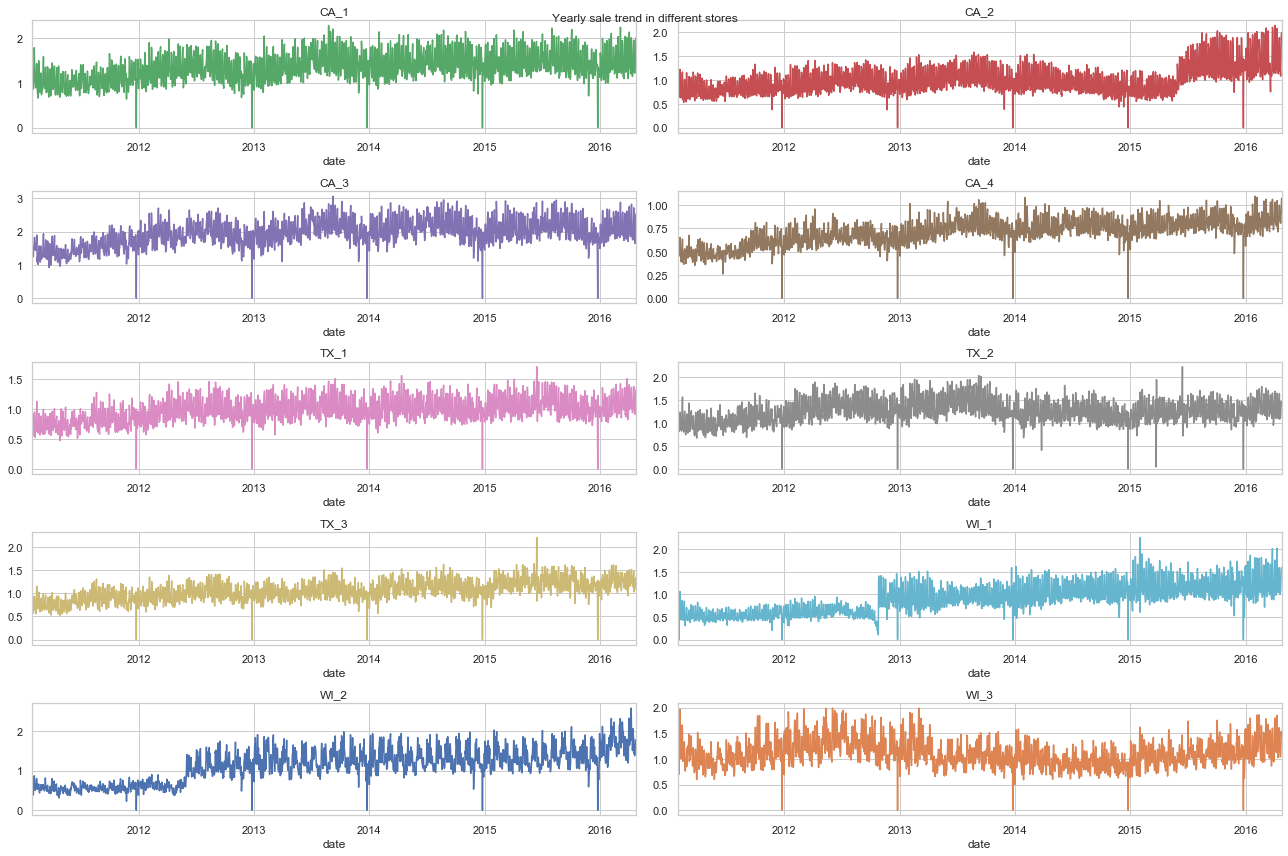

In [28]:
#new_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
#monthly_store_sales = sales_by_store.groupby(['month']).mean().reindex(new_order, axis=0)
fig, axs = plt.subplots(5,2,figsize=(18,12))
axs = axs.flatten()
ax_idx = 0
for col in monthly_store_sales.columns[0:11]:
    sales_by_store[col].plot(color=next(color_cycle), ax=axs[ax_idx])
    axs[ax_idx].set_title(str(col))
    ax_idx+=1
plt.suptitle('Yearly sale trend in different stores')
plt.tight_layout()
plt.show()